# Guided Capstone Step 3 Exploratory Data Analysis

With Data Wrangling out of the way, it's time to move into the Exploratory Data Analysis phase of this guided capstone. In this exercise, you'll learn to build data profiles and plots, including a relationship plot and a data correlation plot. You'll also implement k-means clustering, complete clusters, and update a dataframe as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as you did in step 2 of the guided capstone. Print out your current working directory to confirm you are in the correct project directory. </font>**

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**<font color='teal'> If you need to change your path, refer back to step 2 to review how to do this. Load the csv file you created in step 2. Remember, it should be saved inside your data subfolder. Print the first five rows.</font>**

In [2]:
df = pd.read_csv('D:\Jupyter_Notebook\Springboard\Guided_Capstone\data\step2_output.csv')

In [3]:
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0.0,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [4]:
df.shape

(330, 27)

# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.500000,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.500000,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.500000,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.000000,0.00,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.000000,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.000000,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.000000,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.000000,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.000000,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.000000,3.00,14.0


**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric feature in your dataset and to build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning

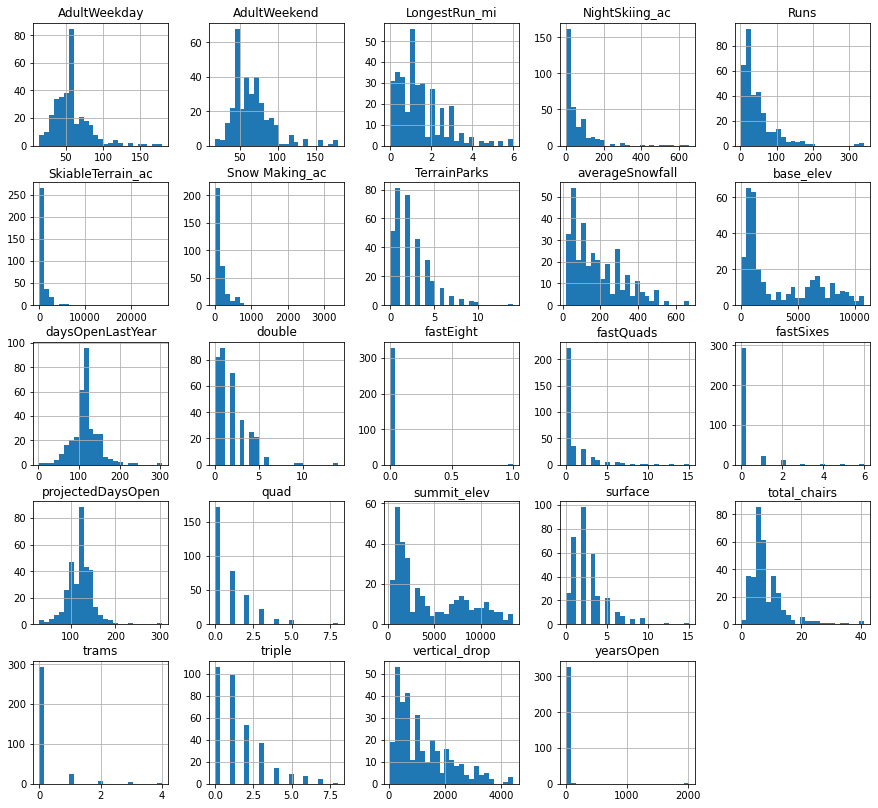

In [7]:
all_hist = df.hist(bins=25,figsize=(15,14))

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

In [8]:
# daysOpenLastYear looks similar to projectedDaysOpen
# summit_elev looks similar to vertical_drop
# most of histgrams are skewed to the right

**<font color='teal'> Okay, now you should be getting a sense for what the data looks like. Let's create a barplot for the categorical features `Region` and `State` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

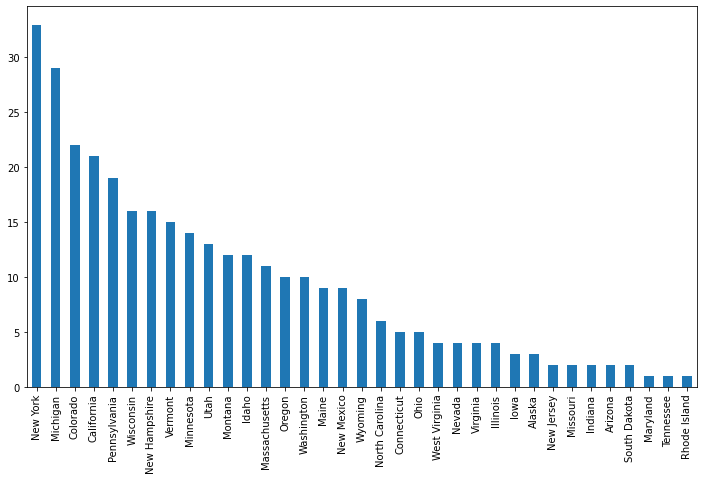

In [9]:
plt.figure(figsize=(12,7))
state_bar = df.state.value_counts().plot.bar()

**<font color='teal'>Region Levels Plot</font>**

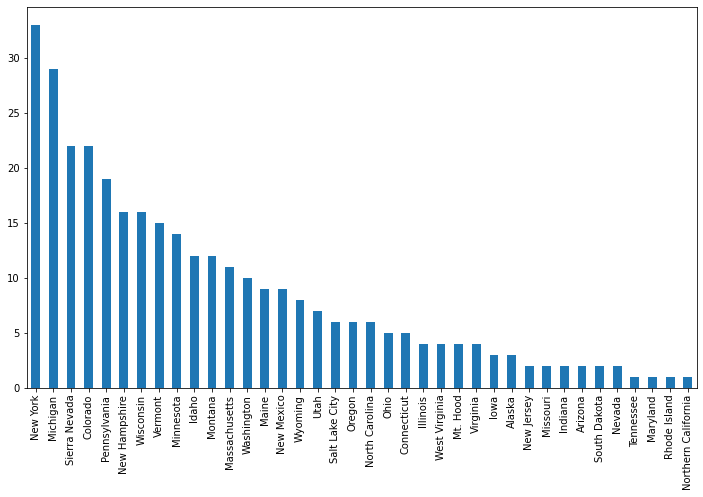

In [10]:
plt.figure(figsize=(12,7))
Region_bar = df.Region.value_counts().plot.bar()

By reviewing the State and Region count plots, you should notice that the Region feature is nearly identical to the State feature and therfore you can remove the Region column from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [6]:
df.drop(columns=['Region'],inplace = True)

In [7]:
df.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## Anamolies & outliers - review boxplots

**<font color='teal'> Print a boxplot for every column</font>**

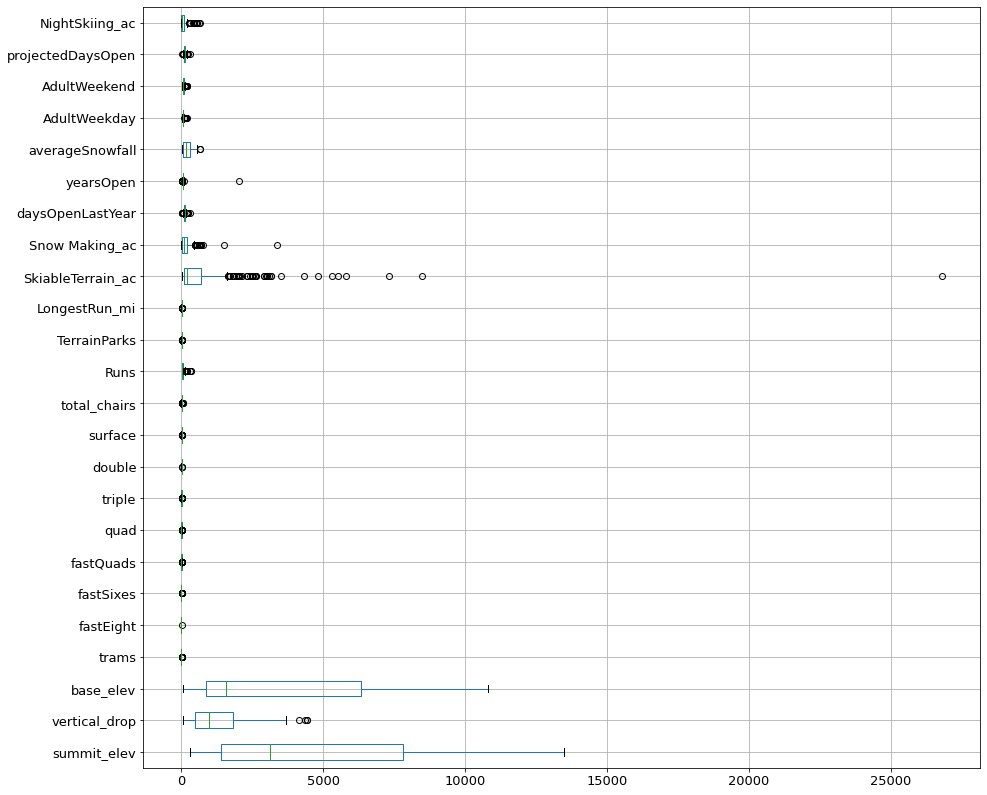

In [13]:
all_box = df.boxplot(vert=False,fontsize=13,figsize=(15,14))

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations, or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>**Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed**</font>

In [14]:
#calculate IQR, but noticed that trams, fastEight, fastSixes has 0 IQR. check back to the histgrams for these columns, 
#they are heavily  left skewed, so removal using the Interquartile range will not be suitable for them             
#IQR = df.quantile(0.75)-df.quantile(0.25)
#IQR

In [15]:
# calculate min value before outliers
#low = df.quantile(0.25)-1.5*IQR
#low

In [16]:
# calculate max value before outliers
#high = df.quantile(0.75)+1.5*IQR
#high

In [17]:
#check outliers for each columns
#outlier = (df< low) |(df > high)
#outlier

In [18]:
#if any column in a a row is an outlier, then True
#outlier.any(axis=1)

In [19]:
#if any column in a a row is an outlier, remove that row, only 174 rows are left
#df_no_outlier = df[~outlier.any(axis=1)]
#df_no_outlier.shape

_________________________________________________________________________________________________________________________________________
Since many columns are left skewed, it means the numbers are nor normally distributted. So it is expected that there are lots of outliers on the right hand side of the box plot.If I use IQR to indentify the outliers, a lot of true data will be considered as outliers and be removed. In this case, I will only extract those visually distinguishable outliers, and replace them.

In [8]:
df.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [9]:
# Check if there are any negative numbers in the df
df1 = df.iloc[:,2:]
tf = df1<0
tf.any()
# No negative numbers. 

summit_elev          False
vertical_drop        False
base_elev            False
trams                False
fastEight            False
fastSixes            False
fastQuads            False
quad                 False
triple               False
double               False
surface              False
total_chairs         False
Runs                 False
TerrainParks         False
LongestRun_mi        False
SkiableTerrain_ac    False
Snow Making_ac       False
daysOpenLastYear     False
yearsOpen            False
averageSnowfall      False
AdultWeekday         False
AdultWeekend         False
projectedDaysOpen    False
NightSkiing_ac       False
dtype: bool

In [10]:
#these columns will not be treated because these columns indicates the number of chairlift.
#For chairlift, the data is real, but heavily left skewed. If we treat large numbers as outliers, we will lose lots of important information.   
No_treat = ['double','trams','triplr','fastEight','fastQuads','fastSixes','quad','surface','total_chairs']

In [11]:
# replace visually distinguishable outliers with the median of the column

In [12]:
# This skiable terrain is obviously too big
df['SkiableTerrain_ac'].max()

26819.0

In [13]:
df['SkiableTerrain_ac'].replace({df['SkiableTerrain_ac'].max():df['SkiableTerrain_ac'].median()},inplace=True)

In [14]:
#This looks reasonable. Choose not to replace it.
df['SkiableTerrain_ac'].max()

8464.0

In [15]:
#This is also a resonable value. Choose not to replace it.
df['Snow Making_ac'].max()

3379.0

In [16]:
# This probobaly means that this resort is opened in 2019, should replace it with 1
df['yearsOpen'].max()

2019.0

In [17]:
df['yearsOpen'].replace({df['yearsOpen'].max():1},inplace=True)

In [18]:
# These columns are left skews, need to take log
#left_skewed = ['LongestRun_mi', 'NightSkiing_ac','Runs','SkiableTerrain_ac',
#          'Snow Making_ac','TerrainParks','averageSnowfall','vertical_drop','yearsOpen']
#df[left_skewed] = df[left_skewed].apply(lambda x: np.log(x + 1))

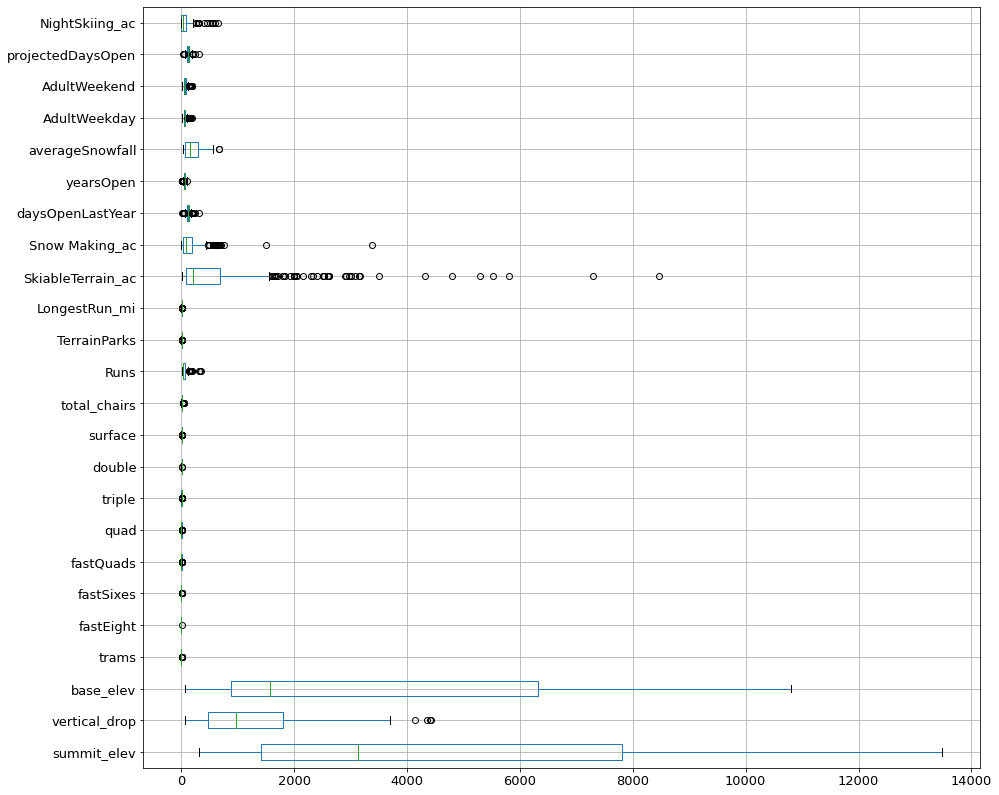

In [19]:
all_box = df.boxplot(vert=False,fontsize=13,figsize=(15,14))

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

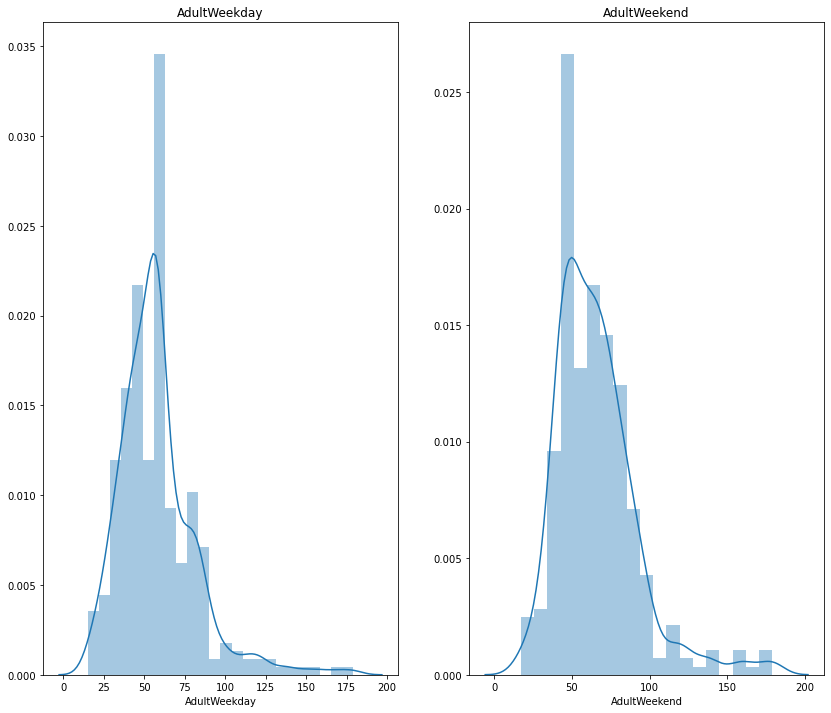

In [43]:
f, axes = plt.subplots(1,2,figsize=(14,12))
ax0 = sns.distplot(df['AdultWeekday'],ax=axes[0])
ax0.set_title('AdultWeekday')
ax1 = sns.distplot(df['AdultWeekend'],ax=axes[1])
ax1.set_title('AdultWeekend');

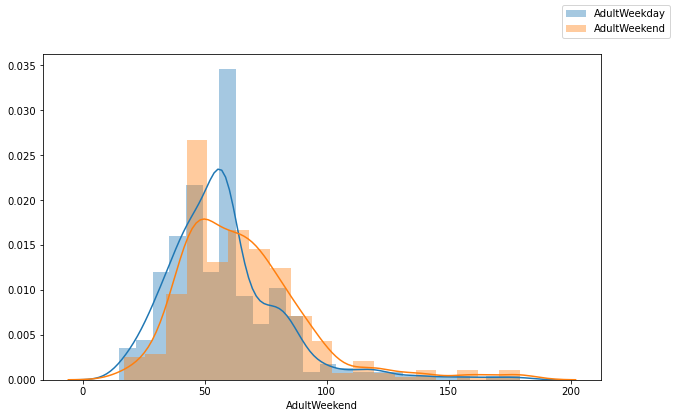

In [42]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df['AdultWeekday'])
sns.distplot(df['AdultWeekend'])
fig.legend(labels=['AdultWeekday','AdultWeekend']);

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

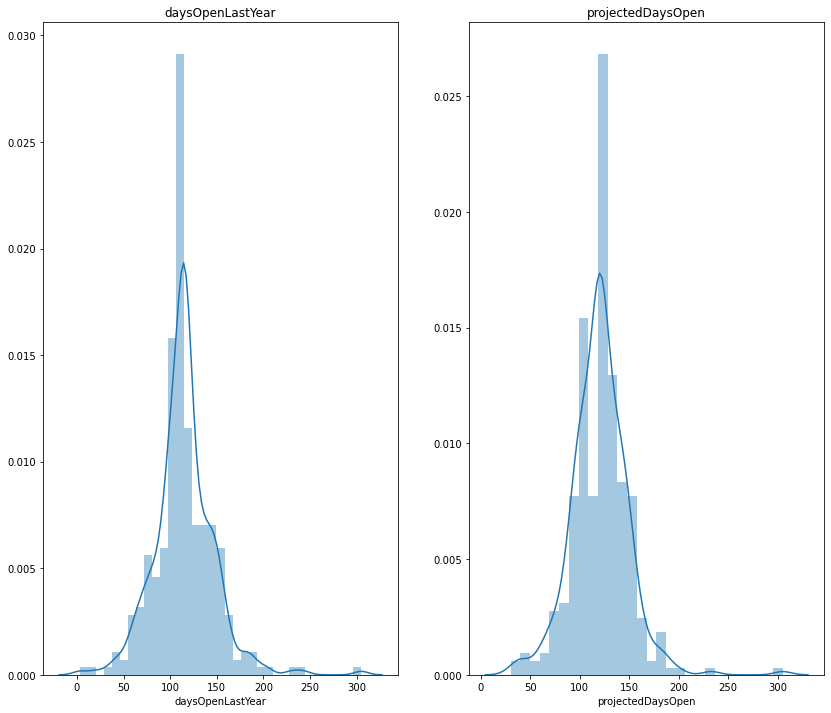

In [41]:
f, axes = plt.subplots(1,2,figsize=(14,12))
ax2 = sns.distplot(df['daysOpenLastYear'],ax=axes[0])
ax2.set_title('daysOpenLastYear')
ax3 = sns.distplot(df['projectedDaysOpen'],ax=axes[1])
ax3.set_title('projectedDaysOpen');

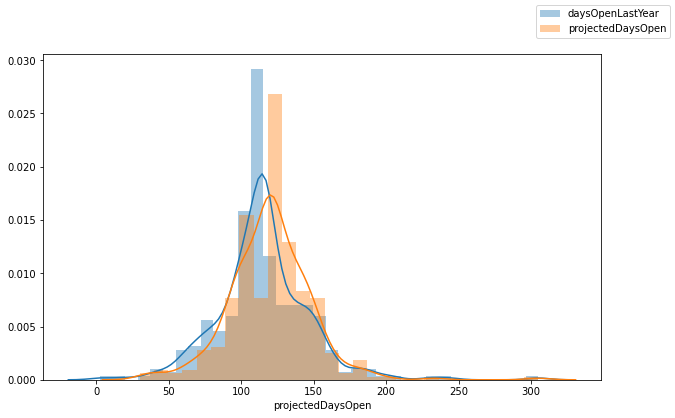

In [40]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df['daysOpenLastYear'])
sns.distplot(df['projectedDaysOpen'])
fig.legend(labels=['daysOpenLastYear','projectedDaysOpen']);

In [24]:
df.groupby('state')['AdultWeekend'].mean()

state
Alaska             57.333333
Arizona            83.500000
California         74.476190
Colorado          102.818182
Connecticut        56.800000
Idaho              54.083333
Illinois           46.250000
Indiana            48.500000
Iowa               41.666667
Maine              59.666667
Maryland           79.000000
Massachusetts      57.454545
Michigan           53.758621
Minnesota          49.667143
Missouri           48.000000
Montana            51.500000
Nevada             81.000000
New Hampshire      75.500000
New Jersey         84.495000
New Mexico         65.666667
New York           58.945455
North Carolina     64.166667
Ohio               45.400000
Oregon             65.800000
Pennsylvania       61.947368
Rhode Island       71.000000
South Dakota       51.500000
Tennessee          65.000000
Utah               90.461538
Vermont            86.933333
Virginia           68.000000
Washington         71.101000
West Virginia      79.750000
Wisconsin          53.250000
Wyoming 

After reviewing these response varible distributions, there doesn't appear to be any data issues to mitigate. Now, you'll move on to investigating feature relationships and interactions between the features and the response.

# Explore data relationships

<font color='teal'>**Create pairplots, or what is commonly referred to as biplots**</font>

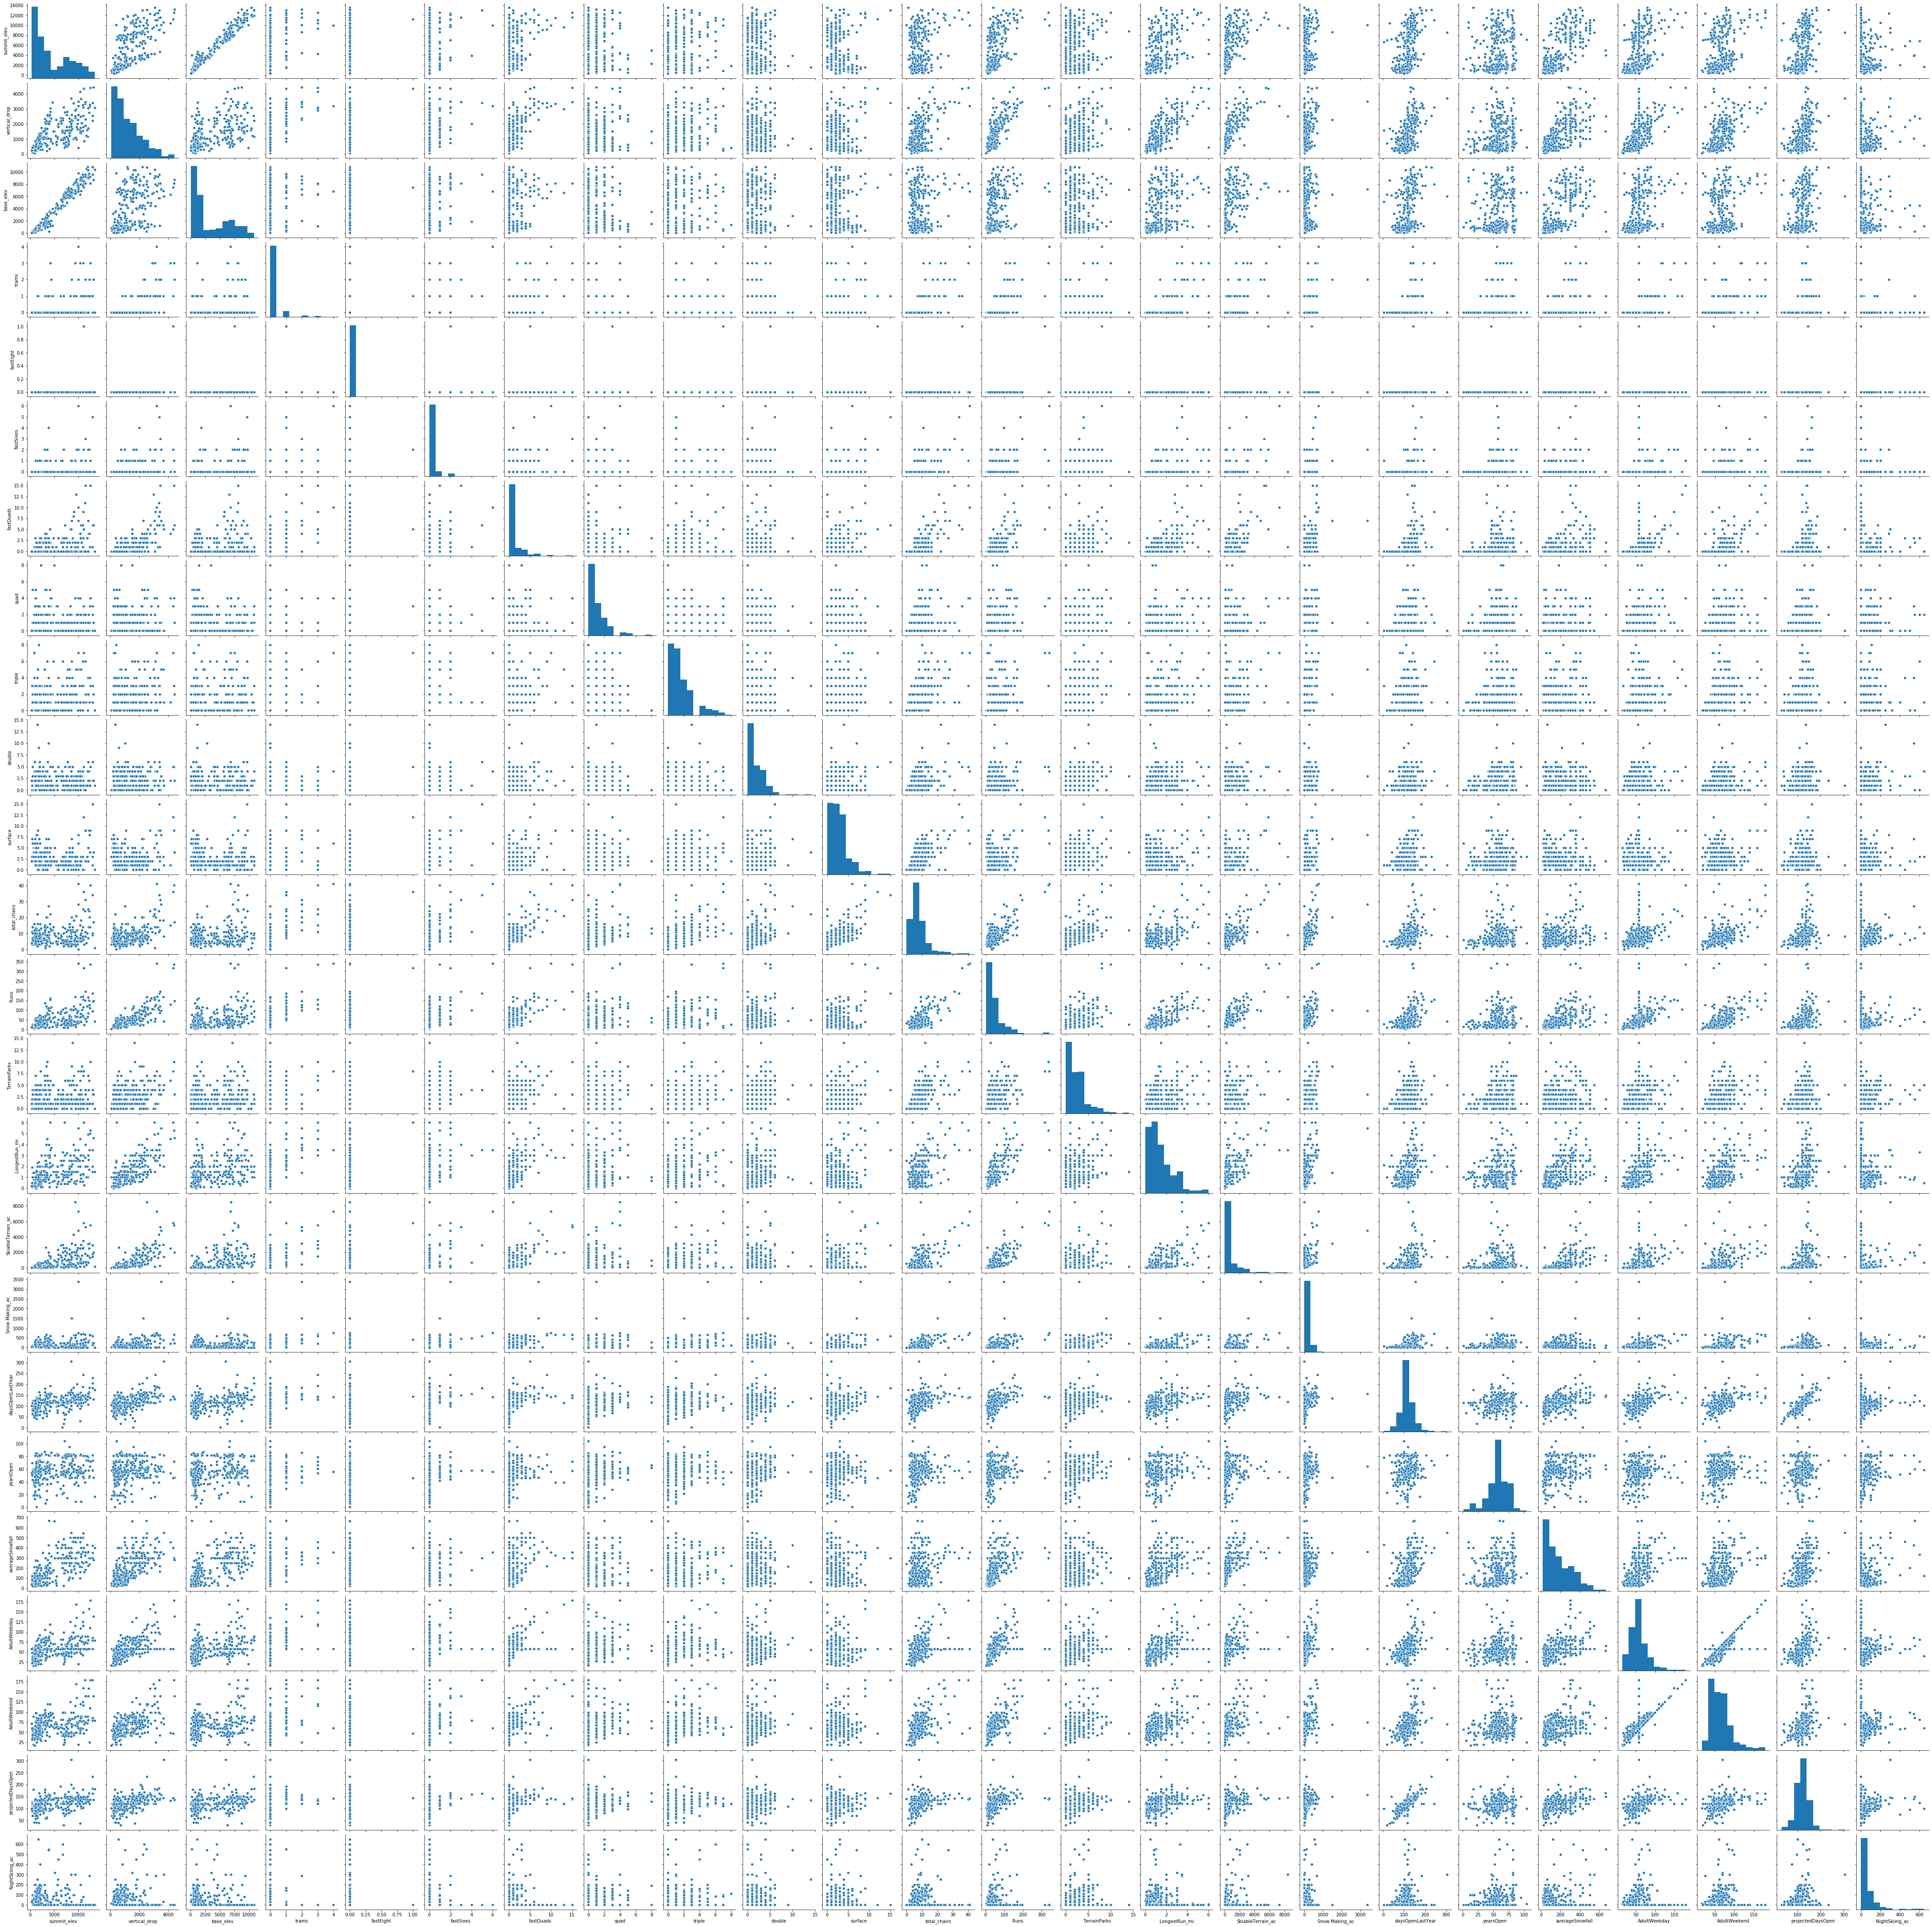

In [36]:
sns.pairplot(df)

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

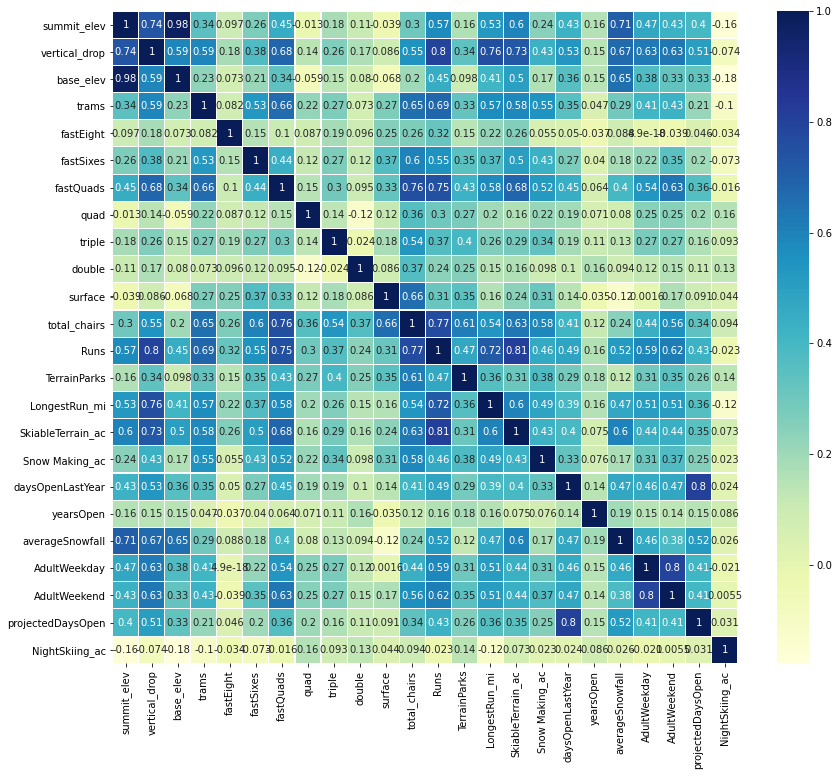

In [26]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

When reviewing the Pearson correlation coefficient heat map, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

In [27]:
# from the heatmap, we can see the correlation between summit_elev and base_elev is 98%, so we only need one of these two columns
# drop base_elev
df.drop(['base_elev'], axis=1, inplace = True)

In [28]:
df.columns

Index(['Name', 'state', 'summit_elev', 'vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac'],
      dtype='object')

Now you'll address the feature creation piece of this step. You can create additional features through many methods, such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in your model development dataset.

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps you determine the number of clusters to include in your k-means clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [29]:
from sklearn.cluster import KMeans
x = df.drop(['Name','state'],axis=1).values

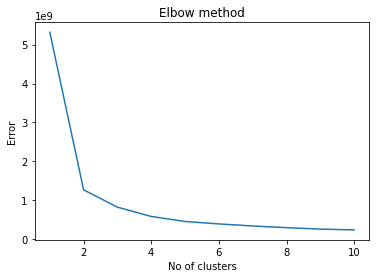

In [31]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
#import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error');
#plt.show()

<font color='teal'>**Fit the k-means algorithm with the k parameter set to three and plot the results.**</font>

In [39]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
labels=kmeans.predict(x)

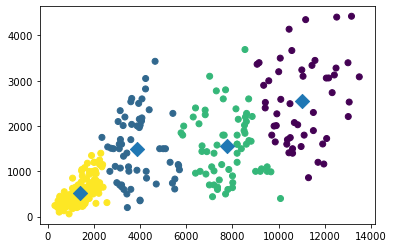

In [37]:
plt.scatter(x[:, 0], x[:, 1],c=labels)
centroids = kmeans.cluster_centers_
centroid_x=centroids[:,0]
centroid_y=centroids[:,1]

plt.scatter(centroid_x,centroid_y,marker='D',s=100)

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step of the guided capstone and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [44]:
df['cluster'] = pd.Series(predict, index=df.index)

In [45]:
df.columns

Index(['Name', 'state', 'summit_elev', 'vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac', 'cluster'],
      dtype='object')

In [46]:
df.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,cluster
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,2
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,2
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1


In [47]:
df.to_csv('D:\Jupyter_Notebook\Springboard\Guided_Capstone\data\step3_output.csv',index=False, header=True)